In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


# 데이터 로드
df = pd.read_csv("C:/Users/tisxo/Downloads/car_evaluation.csv")


In [7]:
# 데이터 확인
print(df)
print("컬럼 확인:", df.columns)

      vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]
컬럼 확인: Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')


In [3]:
# 결측치 확인
print("결측치 확인 (제거 전):")
print(df.isnull().sum())

결측치 확인 (제거 전):
vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


In [9]:
# 결측치 처리
df = df.dropna()

In [11]:
print("결측치 확인 (제거 후):")
print(df.isnull().sum())

결측치 확인 (제거 후):
vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


In [13]:
# 레이블 확인 (imbalanced data)
print(df['unacc'].value_counts())

unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


Text(0.5, 1.0, 'Label Distribution')

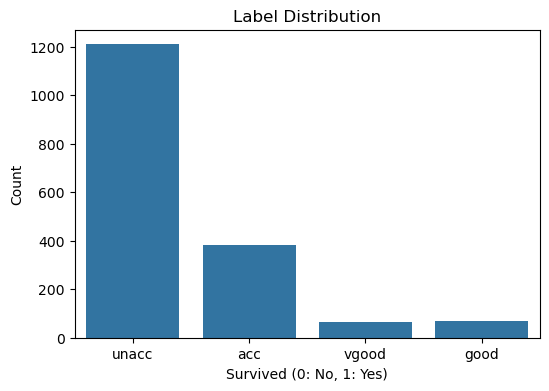

In [15]:
# 레이블 분포 시각화
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='unacc')  # survived 레이블 분포
plt.xlabel("Survived (0: No, 1: Yes)")
plt.ylabel("Count")
plt.title("Label Distribution")

In [23]:
# 모든 컬럼을 Label Encoding
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # 인코더 저장 (역변환용)


# 변환된 데이터 확인
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [25]:
# 데이터 분할
X = df.drop('unacc', axis=1)
y = df['unacc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# SVM
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print("\n--- confusion_matrix ---")
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.8988439306358381

--- confusion_matrix ---
[[ 61   0  16   0]
 [ 11   2   0   2]
 [  1   0 236   0]
 [  5   0   0  12]]


In [29]:
# LR
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print("\n--- confusion_matrix ---")
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.684971098265896

--- confusion_matrix ---
[[ 12   0  64   1]
 [  2   0  13   0]
 [ 13   0 224   0]
 [ 11   0   5   1]]


In [31]:
#DT
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print("\n--- confusion_matrix ---")
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9710982658959537

--- confusion_matrix ---
[[ 73   2   0   2]
 [  2  12   0   1]
 [  1   0 236   0]
 [  0   2   0  15]]


In [33]:
# RF
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print("\n--- confusion_matrix ---")
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9595375722543352

--- confusion_matrix ---
[[ 73   1   2   1]
 [  3   9   0   3]
 [  2   0 235   0]
 [  2   0   0  15]]


In [35]:
# KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
pred_knn = clf_knn.predict(X_test)

print("\n--- K-Nearest Neighbors Classifier ---")
print(accuracy_score(y_test, pred_knn))
print("\n--- confusion_matrix ---")
print(confusion_matrix(y_test, pred_knn))


--- K-Nearest Neighbors Classifier ---
0.8757225433526011

--- confusion_matrix ---
[[ 54   1  22   0]
 [ 12   2   1   0]
 [  0   0 237   0]
 [  6   0   1  10]]
